<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [2]:
import pandas as pd
import numpy as np
import gensim
import re
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import spacy
from gensim.models.coherencemodel import CoherenceModel

nlp = spacy.load("en_core_web_lg")

In [3]:
def compute_coherence_values(dictionary, corpus, limit, n_workers, state, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """

    coherence_values = []

    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=n_workers, random_state=state)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                     'num_topics': num_topics,
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [4]:
df = pd.read_csv('..\module1-text-data\data\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df.shape

(28332, 24)

In [6]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [7]:
tokens = []

for doc in nlp.pipe(df['reviews.text']):

    doc_tokens = []

    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())

    tokens.append(doc_tokens)

In [8]:
len(tokens) == df.shape[0]

True

In [9]:
tokens[:5]

[['order',
  '3',
  'item',
  'bad',
  'quality',
  'miss',
  'backup',
  'spring',
  'pc',
  'aluminum',
  'battery',
  'work'],
 ['bulk', 'expensive', 'way', 'product', 'like'],
 ['Duracell', 'price', 'happy'],
 ['work', 'brand', 'battery', 'well', 'price'],
 ['battery', 'long', 'last', 'price', 'great']]

In [10]:
id2word = corpora.Dictionary(tokens)

In [11]:
len(id2word.keys())

9705

In [12]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [13]:
len(id2word.keys())

3082

In [14]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [15]:
corpora[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [16]:
coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpora,
                                                        start=3,
                                                        limit=40,
                                                        step=2,
                                                        passes=1,
                                                        n_workers=16,
                                                        state=1337)

In [17]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [18]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.313736
1,0,5,-2.365223
2,0,7,-2.347826
3,0,9,-2.387286
4,0,11,-2.369857


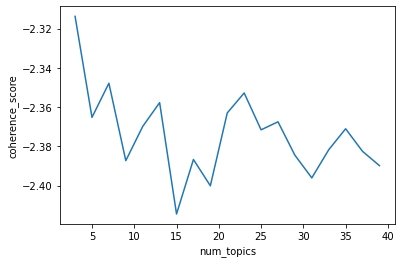

In [19]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)


In [20]:
lda = LdaMulticore(corpus=corpora,
                   id2word=id2word,
                   num_topics=3,
                   passes=50,
                   random_state=1337,
                   workers=16)

In [21]:
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()] # Lets use some boilerplate regex code :)
topics = [' '.join(t[0:5]) for t in words]

In [22]:
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tablet great good use read

------ Topic 1 ------
battery great good price work

------ Topic 2 ------
love tablet kid buy old



In [23]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [24]:
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.026503 -0.139102       1        1  36.595165
1     -0.209426  0.055456       2        1  33.429806
2      0.182922  0.083646       3        1  29.975023, topic_info=         Term         Freq        Total Category  logprob  loglift
3     battery  9897.000000  9897.000000  Default  30.0000  30.0000
84       love  6115.000000  6115.000000  Default  29.0000  29.0000
2069   tablet  7182.000000  7182.000000  Default  28.0000  28.0000
169       kid  2835.000000  2835.000000  Default  27.0000  27.0000
481       old  2445.000000  2445.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
44    perfect   649.350525  1122.168701   Topic3  -4.9867   0.6578
1785   kindle   693.411743  1348.208740   Topic3  -4.9211   0.5399
13       like   708.513977  2817.197266   Topic3  -4.8995  -0.1755
32       good   679.879028  7011.356445   Topic3  -4.9408  -1.1286
35        lot   509.247955  1283.624146   Topic3  -5.2298   0.2803

[230 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2394      1  0.990837      $
2394      3  0.006849      $
194       1  0.015644      2
194       2  0.286815      2
194       3  0.696699      2
...     ...       ...    ...
96        2  0.074602   year
96        3  0.920984   year
857       2  0.003978  young
857       3  0.994448  young
1085      3  0.996912     yr

[386 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [25]:
lda[corpora[0]]

[(0, 0.032472014), (1, 0.9375395), (2, 0.02998847)]

In [26]:
df['reviews.text'][0]

'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [27]:
distro = [lda[d] for d in corpora]

In [28]:
def update(doc):
        d_dist = {k:0 for k in range(0,3)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist

new_distro = [update(d) for d in distro]

In [29]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

In [30]:
doc_topics.head()

,tablet great good use read,battery great good price work,love tablet kid buy old
0,0.032461,0.937551,0.029988
1,0.062706,0.877403,0.059890
2,0.090079,0.815790,0.094130
3,0.058475,0.885560,0.055965
4,0.057269,0.886112,0.056619


In [31]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [32]:
doc_topics['primary_topic'].value_counts()

battery great good price work    12190
love tablet kid buy old           8244
tablet great good use read        7898
Name: primary_topic, dtype: int64

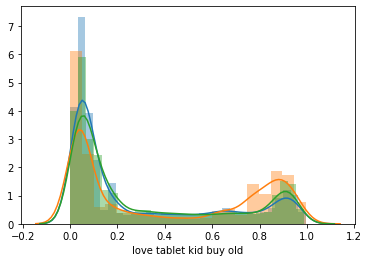

In [48]:
import seaborn as sns

sns.distplot(doc_topics['tablet great good use read'])
sns.distplot(doc_topics['battery great good price work'])
sns.distplot(doc_topics['love tablet kid buy old']);


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling